# Comparison

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [16]:
with open('../../variables.pkl', 'rb') as f:
    data = pickle.load(f)

test_results = ['dtw', 'polynomial', 'rbf']

colors = {
    'dtw': 'blue',
    'polynomial': 'green',
    'rbf': 'red'
}


## Accuracy

dtw_accuracy = 0.975
polynomial_accuracy = 0.675
rbf_accuracy = 0.975


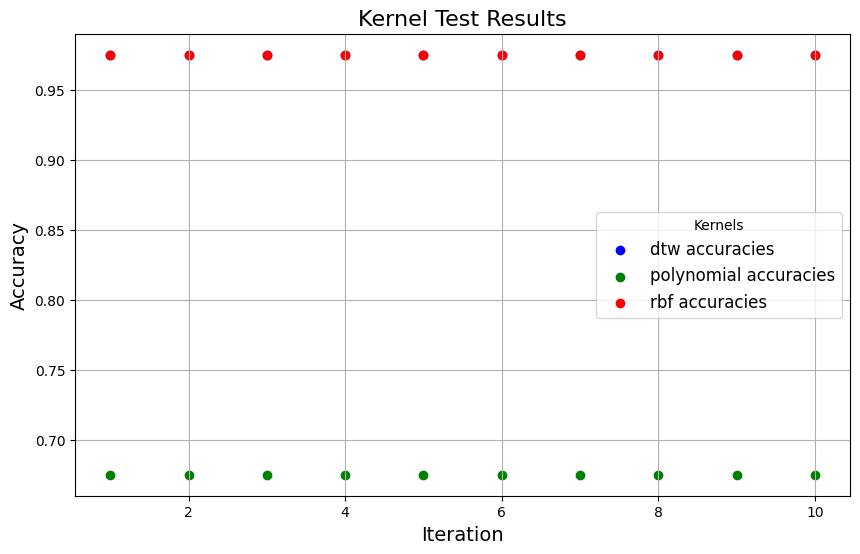

In [23]:
def compute_stats(test_result_name, accuracies):
    mean = np.mean(accuracies)
    print(f'{test_result_name}_accuracy = {mean}')
    return accuracies

accuracies_dict = {
    name: compute_stats(name, data[f'{name}_test_result']['accuracies_history']) 
    for name in test_results
}

iterations = np.arange(1, len(accuracies_dict['dtw']) + 1)


plt.figure(figsize=(10, 6))

for name, accuracies in accuracies_dict.items():
    plt.scatter(iterations, accuracies, color=colors[name], label=f'{name} accuracies')

plt.title('Kernel Test Results', fontsize=16)
plt.xlabel('Iteration', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)

plt.grid(True)
plt.legend(title="Kernels", fontsize=12)
plt.show()

## Training

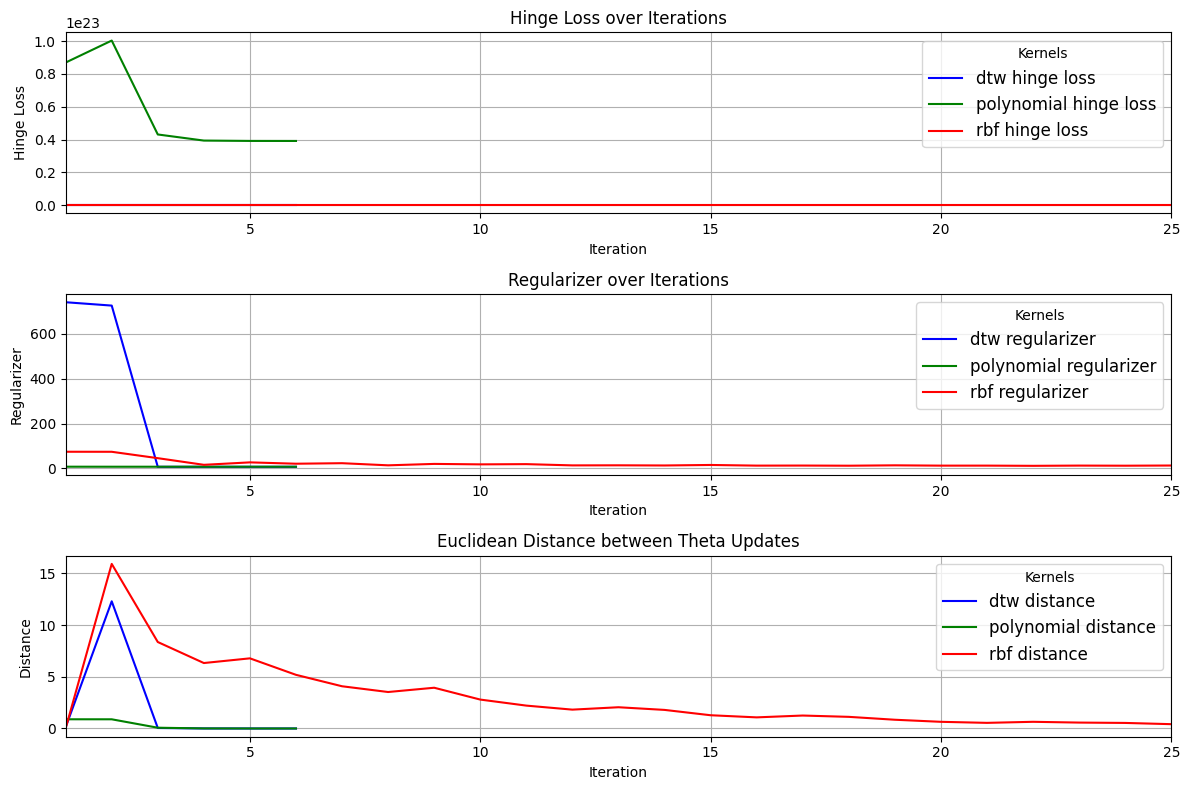

In [26]:
hinge_loss_dict = {
    name: data[f'{name}_test_result']['hinge_loss_history'] 
    for name in test_results
}

regularizer_dict = {
    name: data[f'{name}_test_result']['regularizer_history'] 
    for name in test_results
}

distance_dict = {
    name: data[f'{name}_test_result']['distance_history'] 
    for name in test_results
}

max_length = max(
    max(len(v) for v in hinge_loss_dict.values()),
    max(len(v) for v in regularizer_dict.values()),
    max(len(v) for v in distance_dict.values())
)

def pad_vector(vector, target_length):
    padding_size = target_length - len(vector)
    return np.pad(vector, (0, padding_size), mode='constant', constant_values=np.nan)

hinge_loss_dict = {name: pad_vector(history, max_length) for name, history in hinge_loss_dict.items()}
regularizer_dict = {name: pad_vector(history, max_length) for name, history in regularizer_dict.items()}
distance_dict = {name: pad_vector(history, max_length) for name, history in distance_dict.items()}


iterations = range(1, max_length + 1)

plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
for name, hinge_loss in hinge_loss_dict.items():
    plt.plot(iterations, hinge_loss, color=colors[name], label=f'{name} hinge loss')
plt.xlabel("Iteration")
plt.ylabel("Hinge Loss")
plt.title(f"Hinge Loss over Iterations")
plt.legend(title="Kernels", fontsize=12)
plt.xlim(1,25)
plt.grid(True)

plt.subplot(3, 1, 2)
for name, regularizer in regularizer_dict.items():
    plt.plot(iterations, regularizer, color=colors[name], label=f'{name} regularizer')
plt.xlabel("Iteration")
plt.ylabel("Regularizer")
plt.title(f"Regularizer over Iterations")
plt.legend(title="Kernels", fontsize=12)
plt.xlim(1,25)
plt.grid(True)

plt.subplot(3, 1, 3)
for name, distance in distance_dict.items():
    plt.plot(iterations, distance, color=colors[name], label=f'{name} distance')
plt.xlabel("Iteration")
plt.ylabel("Distance")
plt.title(f"Euclidean Distance between Theta Updates")
plt.legend(title="Kernels", fontsize=12)
plt.xlim(1,25)
plt.grid(True)

plt.tight_layout()
plt.show()

## Precision and Recall

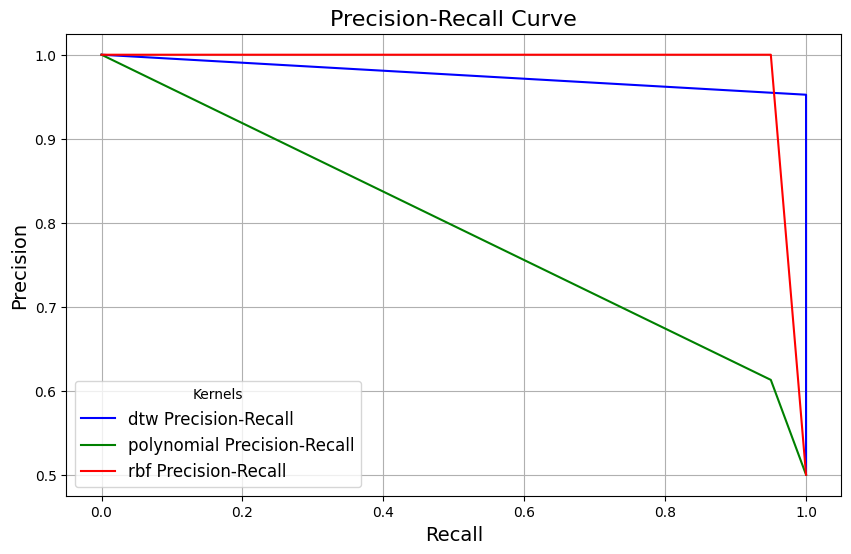

In [19]:
precision_dict = {
    name: data[f'{name}_test_result']['precision'] 
    for name in test_results
}

recall_dict = {
    name: data[f'{name}_test_result']['recall'] 
    for name in test_results
}

thresholds_dict = {
    name: data[f'{name}_test_result']['thresholds'] 
    for name in test_results
}

plt.figure(figsize=(10, 6))
for name in test_results:
    precision = precision_dict[name]
    recall = recall_dict[name]
    
    plt.plot(recall, precision, color=colors.get(name, 'black'), label=f'{name} Precision-Recall')

plt.xlabel('Recall', fontsize=14)
plt.ylabel('Precision', fontsize=14)
plt.title('Precision-Recall Curve', fontsize=16)
plt.grid(True)
plt.legend(title="Kernels", fontsize=12)
plt.show()

## ROC

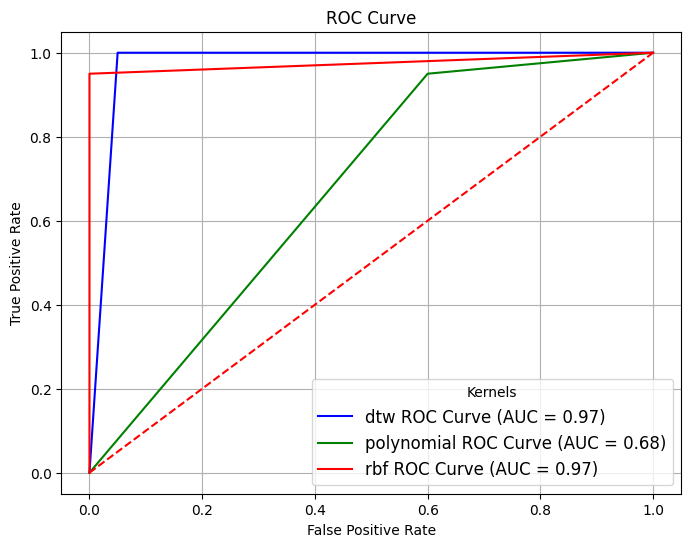

In [20]:
fpr_dict = {
    name: data[f'{name}_test_result']['fpr'] 
    for name in test_results
}

tpr_dict = {
    name: data[f'{name}_test_result']['tpr'] 
    for name in test_results
}

auc_dict = {
    name: data[f'{name}_test_result']['auc'] 
    for name in test_results
}


plt.figure(figsize=(8, 6))
for name in test_results:
    fpr = fpr_dict[name]
    tpr = tpr_dict[name]
    auc = auc_dict[name]

    plt.plot(fpr, tpr, color=colors.get(name, 'black'), label=f'{name} ROC Curve (AUC = {auc:.2f})')

plt.plot([0, 1], [0, 1], color='red', linestyle='--') 
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC Curve')
plt.legend(title="Kernels", fontsize=12)
plt.grid(True)
plt.show()

## Weights

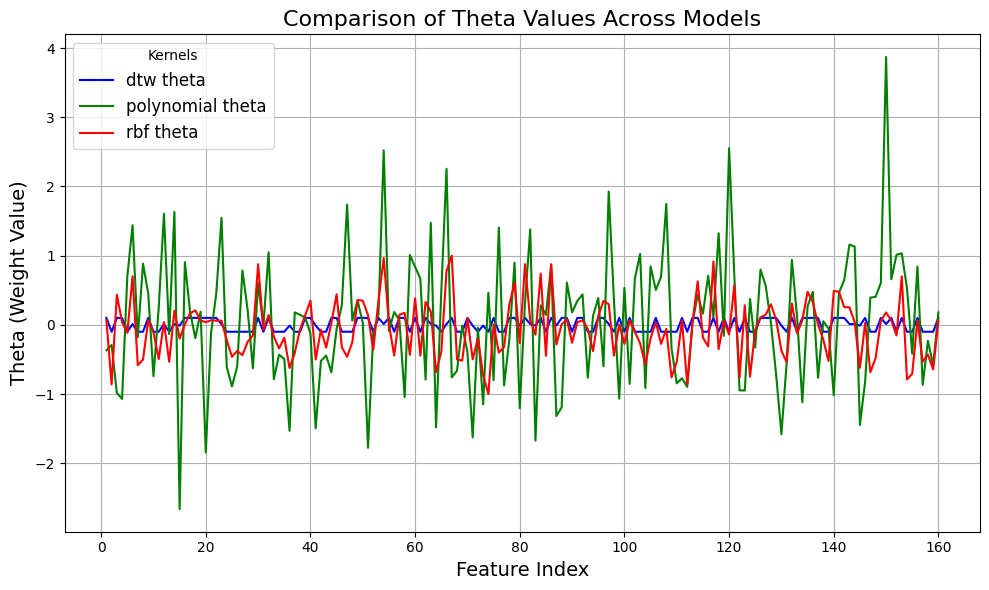

In [21]:
theta_dict = {
    name: data[f'{name}_test_result']['best_theta'] 
    for name in test_results
}


num_features = len(theta_dict['dtw'])

plt.figure(figsize=(10, 6))

for name, theta in theta_dict.items():
    feature_indices = range(1, num_features + 1) 
    plt.plot(feature_indices, theta, color=colors.get(name, 'black'), label=f'{name} theta')

plt.xlabel('Feature Index', fontsize=14)
plt.ylabel('Theta (Weight Value)', fontsize=14)
plt.title('Comparison of Theta Values Across Models', fontsize=16)
plt.grid(True)
plt.legend(title="Kernels", fontsize=12)

plt.tight_layout()
plt.show()